In [6]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
#imports
import sys,os,os.path
import math
import random
import matplotlib.pyplot as plt
import time
import glob 
import copy
import enum
import numpy as np
from PIL import Image
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
import torchvision      
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import pandas as pd

In [1]:
#The below code is used as was provided in the Homework 9 lab manual handout

import csv

sentences = []
sentiments = []
count = 0
with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    # ignore the first line
    next(reader)
    for row in reader:
        sentences.append(row[0])
        sentiments.append(row[1])


print(sentences)

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .", '$ESI on lows, down $1.50 to $2.50 BK a real possibility', "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .", 'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .', 'The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .', "$SPY wouldn't be surprised to see a green close", "Shell's $70 Billion BG Deal Meets Shareholder Skepticism", 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimat

In [2]:
word_tokenized_sentences = [ sentence . split () for sentence in sentences ]
print ( word_tokenized_sentences [:2])

[['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'s", 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', ',', 'a', 'Communities', 'Platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.'], ['$ESI', 'on', 'lows,', 'down', '$1.50', 'to', '$2.50', 'BK', 'a', 'real', 'possibility']]


In [12]:
max_len = max ([len ( sentence ) for sentence in
word_tokenized_sentences ])
padded_sentences = [ sentence + ['[PAD]'] * ( max_len - len (
sentence ) ) for sentence in
word_tokenized_sentences ]
print ( padded_sentences [:2])

[['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'s", 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', ',', 'a', 'Communities', 'Platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], ['$ESI', 'on', 'lows,', 'down', '$1.50', 'to', '$2.50', 'BK', 'a', 'real', 'possibility', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'

In [13]:
from transformers import DistilBertTokenizer

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
bert_tokenized_sentences_ids = [ distilbert_tokenizer.encode ( sentence , padding ='max_length',truncation =True ,max_length = max_len ) for sentence in sentences ]
print ( bert_tokenized_sentences_ids [:2])

[[101, 1996, 20248, 19454, 13700, 2015, 2974, 2097, 21155, 3841, 12879, 2239, 1005, 1055, 14658, 7300, 2011, 4346, 3295, 2241, 3945, 2974, 1010, 1037, 4279, 4132, 1010, 3295, 7882, 14959, 4180, 1998, 1037, 2047, 1998, 3928, 3293, 2944, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1002, 9686, 2072, 2006, 2659, 2015, 1010, 2091, 1002, 1015, 1012, 2753, 2000, 1002, 1016, 1012, 2753, 23923, 1037, 2613, 6061, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [14]:
bert_tokenized_sentences_tokens = [ distilbert_tokenizer.convert_ids_to_tokens (sentence ) for sentence in bert_tokenized_sentences_ids]
print ( bert_tokenized_sentences_tokens [:2])

[['[CLS]', 'the', 'geo', '##sol', '##ution', '##s', 'technology', 'will', 'leverage', 'ben', '##ef', '##on', "'", 's', 'gps', 'solutions', 'by', 'providing', 'location', 'based', 'search', 'technology', ',', 'a', 'communities', 'platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], ['[CLS]', '$', 'es', '##i', 'on', 'low', '##s', ',', 'down', '$', '1', '.', '50', 'to', '$', '2', '.', '50', 'bk', 'a', 'real', 'possibility', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '

In [15]:
vocab = {}
vocab['[PAD]'] = 0

# Assuming padded_sentences is defined somewhere in your code
# padded_sentences = [...]
print(vocab)

for sentence in padded_sentences:
    for token in sentence:
        if token not in vocab:
            vocab[token] = len(vocab)

# Convert the tokens to IDs
padded_sentences_ids = [[vocab[token] for token in sentence] for sentence in padded_sentences]
print(padded_sentences_ids[:2])

{'[PAD]': 0}
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 16, 20, 21, 22, 23, 24, 17, 25, 24, 26, 27, 28, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [30, 31, 32, 33, 34, 35, 36, 37, 17, 38, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [44]:
from transformers import DistilBertModel
import torch

model_name = 'distilbert-base-uncased'
distilbert_model = DistilBertModel.from_pretrained(model_name)
# Extract word embeddings
# We will use the last hidden state of the model
# You can use the other hidden states if you want
# The last hidden state is the output of the model
# after passing the input through the model
word_embeddings = []
# Convert padded sentence tokens into ids
for tokens in padded_sentences_ids:
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = distilbert_model(input_ids)
    word_embeddings.append(outputs.last_hidden_state)

print(word_embeddings[0].shape)

torch.Size([1, 81, 768])


In [16]:
from transformers import DistilBertModel
import torch

model_name = 'distilbert-base-uncased'
distilbert_model = DistilBertModel.from_pretrained(model_name)
# Subword embeddings extraction
subword_embeddings = []
for tokens in bert_tokenized_sentences_ids:
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = distilbert_model(input_ids)
    subword_embeddings.append(outputs.last_hidden_state)

print(subword_embeddings[0].shape)


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


torch.Size([1, 81, 768])


In [20]:
# Encode sentiments as one-hot vectors
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define function to encode sentiment as one-hot vector
def encode_sentiment(sentiment):
    if sentiment == 'positive':
        return np.array([1, 0, 0])
    elif sentiment == 'neutral':
        return np.array([0, 1, 0])
    elif sentiment == 'negative':
        return np.array([0, 0, 1])
    else:
        raise ValueError("Invalid sentiment value")


sentiments_one_hot =torch.tensor( [encode_sentiment(sentiment) for sentiment in sentiments])


In [21]:
# Define custom Sentiment Analysis Dataset class
class CustomSentimentAnalysisDataset(Dataset):
    def __init__(self, word_embeddings, sentiments):
        self.word_embeddings = word_embeddings
        self.sentiments = sentiments

    def __len__(self):
        return len(self.word_embeddings)

    def __getitem__(self, idx):
        word_embedding =(self.word_embeddings[idx])
        sentiment =(self.sentiments[idx])

        return word_embedding, sentiment


In [125]:
# Split the data into training and testing sets for word embeddings
from sklearn.model_selection import train_test_split
train_word_embeddings, test_word_embeddings, train_sentiments, test_sentiments = train_test_split(word_embeddings, sentiments_one_hot, test_size=0.2, random_state=42)

# Create DataLoader for training set
train_word_dataset = CustomSentimentAnalysisDataset(train_word_embeddings, train_sentiments)
train_word_dataloader = DataLoader(train_word_dataset, batch_size=1, shuffle=True)

# Create DataLoader for testing set
test_word_dataset = CustomSentimentAnalysisDataset(test_word_embeddings, test_sentiments)
test_word_dataloader = DataLoader(test_word_dataset, batch_size=1, shuffle=True)


In [121]:
# Split the data into training and testing sets for subword embeddings
from sklearn.model_selection import train_test_split
train_subword_embeddings, test_subword_embeddings, train_sentiments, test_sentiments = train_test_split(subword_embeddings, sentiments_one_hot, test_size=0.2, random_state=42)

# Create DataLoader for training set for subword embeddings
train_subword_dataset = CustomSentimentAnalysisDataset(train_subword_embeddings, train_sentiments)
train_subword_dataloader = DataLoader(train_subword_dataset, batch_size=1, shuffle=True)

# Create DataLoader for testing set for subword embeddings
test_subword_dataset = CustomSentimentAnalysisDataset(test_subword_embeddings, test_sentiments)
test_subword_dataloader = DataLoader(test_subword_dataset, batch_size=1, shuffle=True)


In [62]:
class GRUnet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, num_layers, drop_prob=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        out = self.logsoftmax(out)
        return out, h

    def init_hidden(self):
        weight = next(self.parameters()).data
        #                                     batch_size   
        hidden = weight.new(  self.num_layers,     1,         self.hidden_size   ).zero_()
        return hidden


In [135]:
def run_code_for_training_with_GRU( net,train_dataloader,device,model_name, display_train_loss=True):        
    filename_for_out = "performance_numbers_GRU_" + str(10) + ".txt"
    FILE = open(filename_for_out, 'w')
    net.to(device)

    criterion = nn.NLLLoss()
    accum_times = []
    optimizer = optim.Adam(net.parameters(), lr=1e-4, betas = (0.8, 0.999))
    start_time = time.perf_counter()
    training_loss_tally = []
    for epoch in range(10):  
        print("")
        running_loss = 0.0
        for i, data in enumerate(train_dataloader):    
            hidden = net.init_hidden().to(device)     
            
            review_tensor,sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)

            optimizer.zero_grad()
            for k in range(review_tensor.shape[1]):

                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0).to(device), hidden)
            loss = criterion(output, torch.argmax(sentiment.unsqueeze(0),1))
            running_loss += loss.item()
            loss.backward(retain_graph=True)        
            optimizer.step()

            if i % 200 == 199:    
                avg_loss = running_loss / float(200)
                training_loss_tally.append(avg_loss)
                current_time = time.perf_counter()
                time_elapsed = current_time-start_time
                print("[epoch:%d  iter:%4d  elapsed_time: %4d secs]     loss: %.5f" % (epoch+1,i+1, time_elapsed,avg_loss))
                accum_times.append(current_time-start_time)
                FILE.write("%.3f\n" % avg_loss)
                FILE.flush()
                running_loss = 0.0
    print("Total Training Time: {}".format(str(sum(accum_times))))
    print("\nFinished Training\n")
    torch.save(net.state_dict(), f"{model_name}.pt")
    if display_train_loss:
        plt.figure(figsize=(10,5))
        plt.title("Training Loss vs. Iterations for unidirectional GRU using word embeddings")
        plt.plot(training_loss_tally)
        plt.xlabel("iterations")
        plt.ylabel("training loss")

        plt.legend(["Plot of loss versus iterations"], fontsize="x-large")
        plt.savefig("training_loss.png")
        plt.show()
    return training_loss_tally

In [127]:
def run_code_for_testing_text_classification_with_GRU(net, test_dataloader,model_name, device):
    net.load_state_dict(torch.load(f"{model_name}.pt"))
    net.to(device)
    classification_accuracy = 0.0
    negative_total = 0
    positive_total = 0
    neutral_total = 0
    confusion_matrix = torch.zeros(3, 3)
    
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            review_tensor, sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)
            hidden = net.init_hidden().to(device)
            
            for k in range(review_tensor.shape[1]):
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0), hidden)
                
            predicted_idx = torch.argmax(output).item()
            gt_idx = torch.argmax(sentiment).item()
            if i % 100 == 99:
                print("   [i=%d]    predicted_label=%d       gt_label=%d\n\n" % (i+1, predicted_idx, gt_idx))
            
            if predicted_idx == gt_idx:
                classification_accuracy += 1
            
            if gt_idx == 0: 
                positive_total += 1
            elif gt_idx == 1:
                neutral_total += 1
            elif gt_idx == 2:
                negative_total += 1
                
            confusion_matrix[gt_idx, predicted_idx] += 1
            
    classification_accuracy /= len(test_dataloader)
    print("\nOverall classification accuracy: %0.2f%%" % (classification_accuracy * 100))
    
    out_percent = np.zeros((3,3), dtype='float')
    out_percent[0,:] = 100 * confusion_matrix[0,:] / negative_total
    out_percent[1,:] = 100 * confusion_matrix[1,:] / neutral_total
    out_percent[2,:] = 100 * confusion_matrix[2,:] / positive_total
    
    print("\n\nNumber of negative reviews tested: %d" % negative_total)
    print("\nNumber of neutral reviews tested: %d" % neutral_total)
    print("\nNumber of positive reviews tested: %d" % positive_total)
    
    print("\n\nDisplaying the confusion matrix:\n")


    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'],
                yticklabels=['positive', 'neutral', 'negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for word embeddings for Unidirectional GRU')#edit the name of corresponding model for title label
    plt.show()

In [133]:
model = GRUnet(768, hidden_size=100, output_size=3, num_layers=3)
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
number_of_learnable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

num_layers = len(list(model.parameters()))

print("\n\nThe number of layers in the model: %d" % num_layers)
print("\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)




The number of layers in the model: 14

The number of learnable parameters in the model: 382503



[epoch:1  iter: 200  elapsed_time:    7 secs]     loss: 1.02827
[epoch:1  iter: 400  elapsed_time:   15 secs]     loss: 1.00907
[epoch:1  iter: 600  elapsed_time:   23 secs]     loss: 0.91149
[epoch:1  iter: 800  elapsed_time:   31 secs]     loss: 1.06364
[epoch:1  iter:1000  elapsed_time:   39 secs]     loss: 0.97736
[epoch:1  iter:1200  elapsed_time:   47 secs]     loss: 0.96292
[epoch:1  iter:1400  elapsed_time:   55 secs]     loss: 0.97717
[epoch:1  iter:1600  elapsed_time:   63 secs]     loss: 0.96241
[epoch:1  iter:1800  elapsed_time:   71 secs]     loss: 0.92670
[epoch:1  iter:2000  elapsed_time:   79 secs]     loss: 0.93591
[epoch:1  iter:2200  elapsed_time:   88 secs]     loss: 0.99045
[epoch:1  iter:2400  elapsed_time:   96 secs]     loss: 0.95076
[epoch:1  iter:2600  elapsed_time:  104 secs]     loss: 0.91521
[epoch:1  iter:2800  elapsed_time:  112 secs]     loss: 0.96990
[epoch:1  iter:3000  elapsed_time:  120 secs]     loss: 0.95223
[epoch:1  iter:3200  elapsed_time:  128

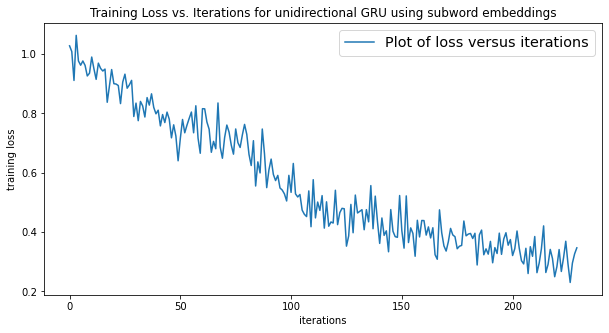

In [91]:
## TRAINING for unidirectional GRU for subword embeddings:
avg_loss_uni_subword= run_code_for_training_with_GRU(net=model,train_dataloader=train_subword_dataloader, device=device, model_name ="unigru_subword", display_train_loss=True)

## Testing for unidirectional GRU for subword embeddings:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_subword_dataloader, model_name="unigru_subword", device=device)


[epoch:1  iter: 200  elapsed_time:    7 secs]     loss: 0.98619
[epoch:1  iter: 400  elapsed_time:   15 secs]     loss: 1.06603
[epoch:1  iter: 600  elapsed_time:   24 secs]     loss: 0.95714
[epoch:1  iter: 800  elapsed_time:   32 secs]     loss: 1.01813
[epoch:1  iter:1000  elapsed_time:   41 secs]     loss: 1.00829
[epoch:1  iter:1200  elapsed_time:   49 secs]     loss: 0.97851
[epoch:1  iter:1400  elapsed_time:   57 secs]     loss: 0.97345
[epoch:1  iter:1600  elapsed_time:   65 secs]     loss: 0.97891
[epoch:1  iter:1800  elapsed_time:   73 secs]     loss: 0.89924
[epoch:1  iter:2000  elapsed_time:   81 secs]     loss: 0.93737
[epoch:1  iter:2200  elapsed_time:   89 secs]     loss: 1.02637
[epoch:1  iter:2400  elapsed_time:   97 secs]     loss: 1.01023
[epoch:1  iter:2600  elapsed_time:  105 secs]     loss: 0.90957
[epoch:1  iter:2800  elapsed_time:  113 secs]     loss: 0.94412
[epoch:1  iter:3000  elapsed_time:  121 secs]     loss: 0.96564
[epoch:1  iter:3200  elapsed_time:  129

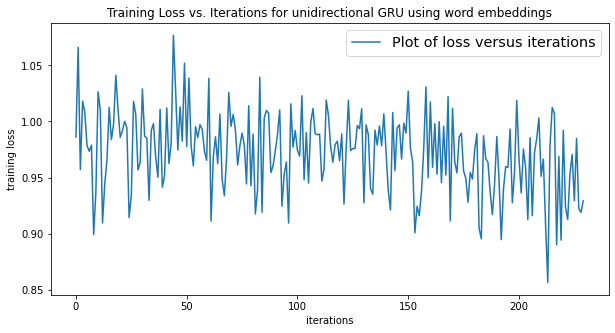

In [111]:

## TRAINING for unidirectional GRU for word embeddings:
avg_loss_uni_word= run_code_for_training_with_GRU(net=model,train_dataloader=train_word_dataloader, device=device, model_name ="unigru_word", display_train_loss=True)

## TESTING for unidirectional GRU for word embeddings:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_word_dataloader, model_name="unigru_word", device=device)

In [29]:
class BiGRUnet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, num_layers, drop_prob=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = True
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, dropout=drop_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply by 2 for bidirectional
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = torch.cat((out[:, -1, :self.hidden_size], out[:, 0, self.hidden_size:]), dim=1)
        out = self.fc(self.relu(out))
        out = self.logsoftmax(out)
        return out, h

    def init_hidden(self, batch_size=1):
        weight = next(self.parameters()).data
        num_directions = 2 if self.bidirectional else 1
        hidden = weight.new(self.num_layers * num_directions, 1, self.hidden_size).zero_()
        return hidden


In [114]:
def run_code_for_training_with_BiGRU( net,train_dataloader,device,model_name, display_train_loss=True):        
    filename_for_out = "performance_numbers_BiGRU" + str(10) + ".txt"
    FILE = open(filename_for_out, 'w')
    net.to(device)
    criterion = nn.NLLLoss()
    accum_times = []
    optimizer = optim.Adam(net.parameters(), lr=1e-4, betas = (0.8, 0.999))
    start_time = time.perf_counter()
    training_loss_tally = []
    for epoch in range(10):  
        print("")
        running_loss = 0.0
        for i, data in enumerate(train_dataloader):    
            hidden = net.init_hidden().to(device)     
            
            review_tensor,sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)

            optimizer.zero_grad()
            for k in range(review_tensor.shape[1]):
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0).to(device), hidden)
            loss = criterion(output, torch.argmax(sentiment.unsqueeze(0),1))
            running_loss += loss.item()
            loss.backward(retain_graph=True)        
            optimizer.step()

            if i % 200 == 199:    
                avg_loss = running_loss / float(200)
                training_loss_tally.append(avg_loss)
                current_time = time.perf_counter()
                time_elapsed = current_time-start_time
                print("[epoch:%d  iter:%4d  elapsed_time: %4d secs]     loss: %.5f" % (epoch+1,i+1, time_elapsed,avg_loss))
                accum_times.append(current_time-start_time)
                FILE.write("%.3f\n" % avg_loss)
                FILE.flush()
                running_loss = 0.0
    print("Total Training Time: {}".format(str(sum(accum_times))))
    print("\nFinished Training\n")
    torch.save(net.state_dict(), f"{model_name}.pt")
    if display_train_loss:
        plt.figure(figsize=(10,5))
        plt.title("Training Loss vs. Iterations for Bidirectional GRU using word embeddings") #edit the name of corresponding model for title label
        plt.plot(training_loss_tally)
        plt.xlabel("iterations")
        plt.ylabel("training loss")
        plt.legend(["Plot of loss versus iterations"], fontsize="x-large")
        plt.savefig("training_loss.png")
        plt.show()
    return training_loss_tally

In [122]:
def run_code_for_testing_text_classification_with_BiGRU(net, test_dataloader,model_name, device):
    net.load_state_dict(torch.load(f"{model_name}.pt"))
    net.to(device)
    classification_accuracy = 0.0
    negative_total = 0
    positive_total = 0
    neutral_total = 0
    confusion_matrix = torch.zeros(3, 3)
    
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            review_tensor, sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)
            hidden = net.init_hidden().to(device)
            
            for k in range(review_tensor.shape[1]):
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0), hidden)
                
            predicted_idx = torch.argmax(output).item()
            gt_idx = torch.argmax(sentiment).item()
            if i % 100 == 99:
                print("   [i=%d]    predicted_label=%d       gt_label=%d\n\n" % (i+1, predicted_idx, gt_idx))
            
            if predicted_idx == gt_idx:
                classification_accuracy += 1
            
            if gt_idx == 0: 
                positive_total += 1
            elif gt_idx == 1:
                neutral_total += 1
            elif gt_idx == 2:
                negative_total += 1
                
            confusion_matrix[gt_idx, predicted_idx] += 1
            
    classification_accuracy /= len(test_dataloader)
    print("\nOverall classification accuracy: %0.2f%%" % (classification_accuracy * 100))
    
    out_percent = np.zeros((3,3), dtype='float')
    out_percent[0,:] = 100 * confusion_matrix[0,:] / negative_total
    out_percent[1,:] = 100 * confusion_matrix[1,:] / neutral_total
    out_percent[2,:] = 100 * confusion_matrix[2,:] / positive_total
    
    print("\n\nNumber of negative reviews tested: %d" % negative_total)
    print("\nNumber of neutral reviews tested: %d" % neutral_total)
    print("\nNumber of positive reviews tested: %d" % positive_total)
    
    print("\n\nDisplaying the confusion matrix:\n")


    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'],
                yticklabels=['positive', 'neutral', 'negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for subword embeddings for Bidirectional GRU')#edit the name of corresponding model for title label
    plt.show()

In [73]:
model1 = BiGRUnet(768, hidden_size=100, output_size=3, num_layers=3)
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
number_of_learnable_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)

num_layers = len(list(model1.parameters()))

print("\n\nThe number of layers in the model: %d" % num_layers)
print("\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)




The number of layers in the model: 26

The number of learnable parameters in the model: 885003



[epoch:1  iter: 200  elapsed_time:   13 secs]     loss: 1.04664
[epoch:1  iter: 400  elapsed_time:   25 secs]     loss: 1.00566
[epoch:1  iter: 600  elapsed_time:   38 secs]     loss: 0.91919
[epoch:1  iter: 800  elapsed_time:   51 secs]     loss: 1.05744
[epoch:1  iter:1000  elapsed_time:   63 secs]     loss: 0.91389
[epoch:1  iter:1200  elapsed_time:   75 secs]     loss: 1.02971
[epoch:1  iter:1400  elapsed_time:   88 secs]     loss: 0.95311
[epoch:1  iter:1600  elapsed_time:  102 secs]     loss: 0.98382
[epoch:1  iter:1800  elapsed_time:  115 secs]     loss: 0.92305
[epoch:1  iter:2000  elapsed_time:  129 secs]     loss: 0.96209
[epoch:1  iter:2200  elapsed_time:  142 secs]     loss: 0.92684
[epoch:1  iter:2400  elapsed_time:  156 secs]     loss: 0.94533
[epoch:1  iter:2600  elapsed_time:  169 secs]     loss: 0.93401
[epoch:1  iter:2800  elapsed_time:  182 secs]     loss: 1.00424
[epoch:1  iter:3000  elapsed_time:  196 secs]     loss: 0.97215
[epoch:1  iter:3200  elapsed_time:  209

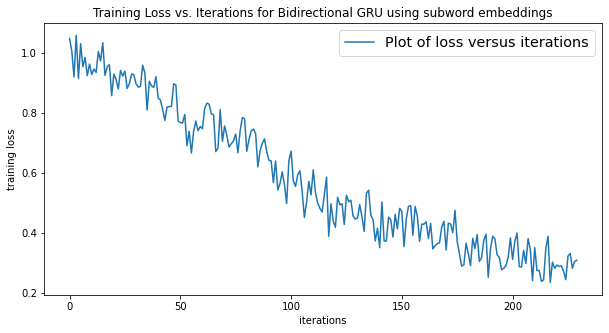

In [38]:
## TRAINING for bidirectional GRU for subword embeddings:
avg_loss_bidirec_subword= run_code_for_training_with_BiGRU(net=model1,train_dataloader=train_subword_dataloader, device=device, model_name ="bigru_subword", display_train_loss=True)

## TESTING for bidirectional GRU for subword embeddings:
run_code_for_testing_text_classification_with_BiGRU(net=model1,test_dataloader=test_subword_dataloader, model_name="bigru_subword", device=device)


[epoch:1  iter: 200  elapsed_time:   11 secs]     loss: 0.97850
[epoch:1  iter: 400  elapsed_time:   23 secs]     loss: 1.01445
[epoch:1  iter: 600  elapsed_time:   35 secs]     loss: 0.97401
[epoch:1  iter: 800  elapsed_time:   47 secs]     loss: 1.00267
[epoch:1  iter:1000  elapsed_time:   59 secs]     loss: 0.98197
[epoch:1  iter:1200  elapsed_time:   70 secs]     loss: 0.95172
[epoch:1  iter:1400  elapsed_time:   82 secs]     loss: 1.03730
[epoch:1  iter:1600  elapsed_time:   94 secs]     loss: 0.99989
[epoch:1  iter:1800  elapsed_time:  106 secs]     loss: 0.96852
[epoch:1  iter:2000  elapsed_time:  117 secs]     loss: 0.99123
[epoch:1  iter:2200  elapsed_time:  129 secs]     loss: 1.00673
[epoch:1  iter:2400  elapsed_time:  141 secs]     loss: 0.99736
[epoch:1  iter:2600  elapsed_time:  153 secs]     loss: 0.93059
[epoch:1  iter:2800  elapsed_time:  166 secs]     loss: 1.02253
[epoch:1  iter:3000  elapsed_time:  178 secs]     loss: 0.95292
[epoch:1  iter:3200  elapsed_time:  190

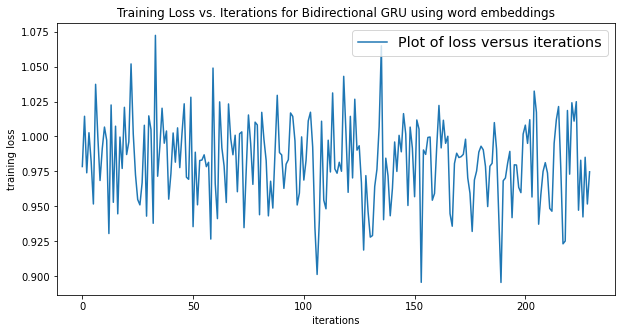

In [51]:

## TRAINING for bidirectional GRU for word embeddings:
avg_loss_bidirec_word= run_code_for_training_with_BiGRU(net=model1,train_dataloader=train_word_dataloader, device=device, model_name ="bigru_word", display_train_loss=True)


## TESTING for bidirectional GRU for word embeddings:
run_code_for_testing_text_classification_with_BiGRU(net=model1,test_dataloader=test_word_dataloader, model_name="bigru_word", device=device)

   [i=100]    predicted_label=1       gt_label=1


   [i=200]    predicted_label=1       gt_label=1


   [i=300]    predicted_label=1       gt_label=1


   [i=400]    predicted_label=1       gt_label=1


   [i=500]    predicted_label=1       gt_label=0


   [i=600]    predicted_label=1       gt_label=1


   [i=700]    predicted_label=1       gt_label=1


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=1       gt_label=1


   [i=1000]    predicted_label=1       gt_label=1


   [i=1100]    predicted_label=1       gt_label=0



Overall classification accuracy: 53.29%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



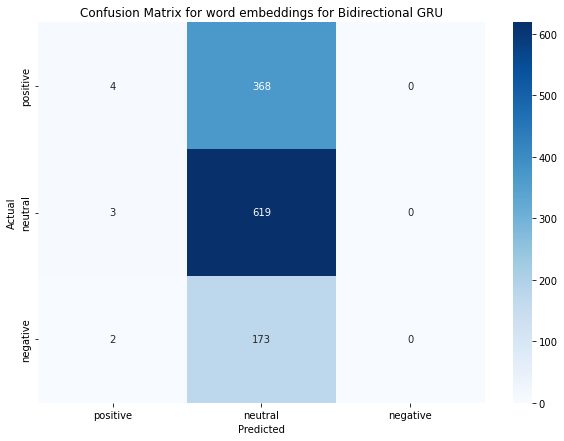

In [83]:
run_code_for_testing_text_classification_with_GRU(net=model1,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=1       gt_label=1


   [i=200]    predicted_label=1       gt_label=0


   [i=300]    predicted_label=1       gt_label=0


   [i=400]    predicted_label=1       gt_label=1


   [i=500]    predicted_label=1       gt_label=1


   [i=600]    predicted_label=1       gt_label=2


   [i=700]    predicted_label=1       gt_label=1


   [i=800]    predicted_label=1       gt_label=0


   [i=900]    predicted_label=1       gt_label=1


   [i=1000]    predicted_label=1       gt_label=1


   [i=1100]    predicted_label=1       gt_label=1



Overall classification accuracy: 55.52%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



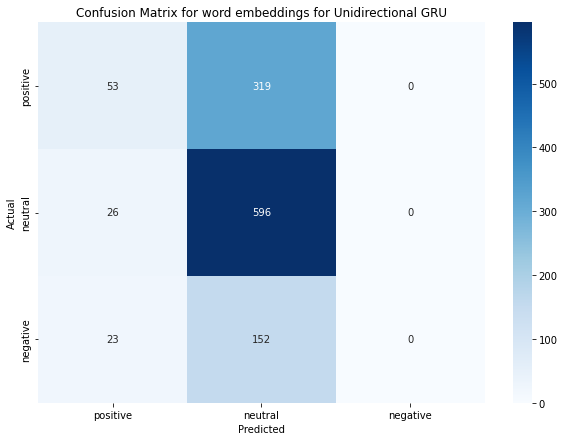

In [80]:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=1       gt_label=1


   [i=200]    predicted_label=1       gt_label=1


   [i=300]    predicted_label=0       gt_label=0


   [i=400]    predicted_label=1       gt_label=0


   [i=500]    predicted_label=1       gt_label=1


   [i=600]    predicted_label=1       gt_label=1


   [i=700]    predicted_label=0       gt_label=0


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=0       gt_label=0


   [i=1000]    predicted_label=0       gt_label=0


   [i=1100]    predicted_label=0       gt_label=2



Overall classification accuracy: 77.67%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



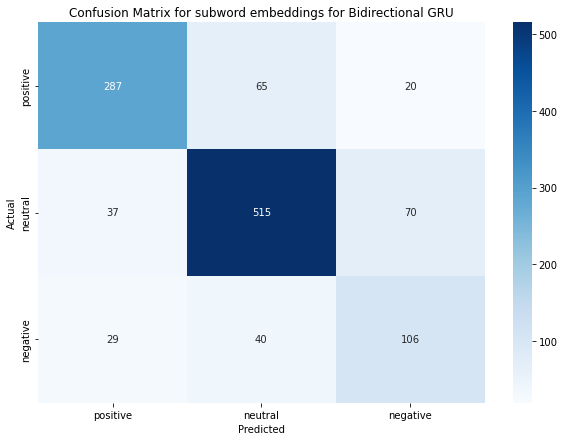

In [42]:
run_code_for_testing_text_classification_with_GRU(net=model1,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=0       gt_label=0


   [i=200]    predicted_label=0       gt_label=0


   [i=300]    predicted_label=0       gt_label=0


   [i=400]    predicted_label=2       gt_label=1


   [i=500]    predicted_label=2       gt_label=2


   [i=600]    predicted_label=1       gt_label=1


   [i=700]    predicted_label=1       gt_label=1


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=1       gt_label=0


   [i=1000]    predicted_label=1       gt_label=1


   [i=1100]    predicted_label=0       gt_label=0



Overall classification accuracy: 76.22%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



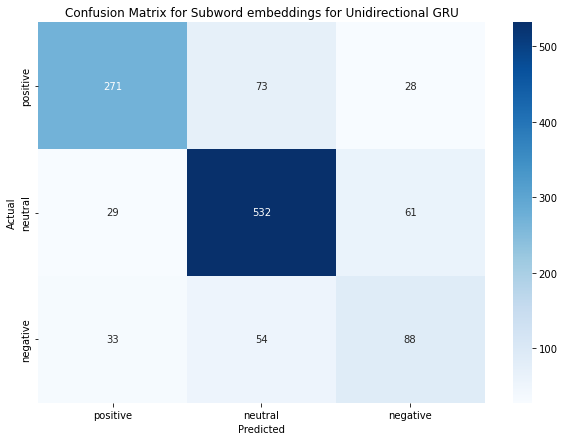

In [93]:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=0       gt_label=0


   [i=200]    predicted_label=0       gt_label=1


   [i=300]    predicted_label=2       gt_label=0


   [i=400]    predicted_label=0       gt_label=0


   [i=500]    predicted_label=1       gt_label=1


   [i=600]    predicted_label=2       gt_label=1


   [i=700]    predicted_label=2       gt_label=1


   [i=800]    predicted_label=0       gt_label=0


   [i=900]    predicted_label=2       gt_label=2


   [i=1000]    predicted_label=1       gt_label=1


   [i=1100]    predicted_label=1       gt_label=1



Overall classification accuracy: 74.94%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



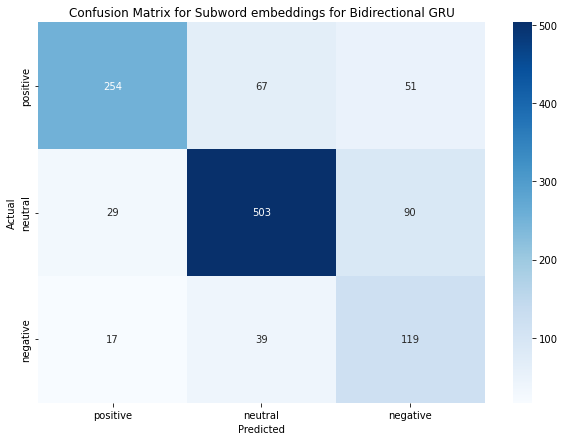

In [102]:
run_code_for_testing_text_classification_with_GRU(net=model1,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=0       gt_label=1


   [i=200]    predicted_label=1       gt_label=0


   [i=300]    predicted_label=1       gt_label=1


   [i=400]    predicted_label=1       gt_label=1


   [i=500]    predicted_label=0       gt_label=0


   [i=600]    predicted_label=1       gt_label=1


   [i=700]    predicted_label=1       gt_label=0


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=1       gt_label=1


   [i=1000]    predicted_label=0       gt_label=0


   [i=1100]    predicted_label=0       gt_label=0



Overall classification accuracy: 56.80%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



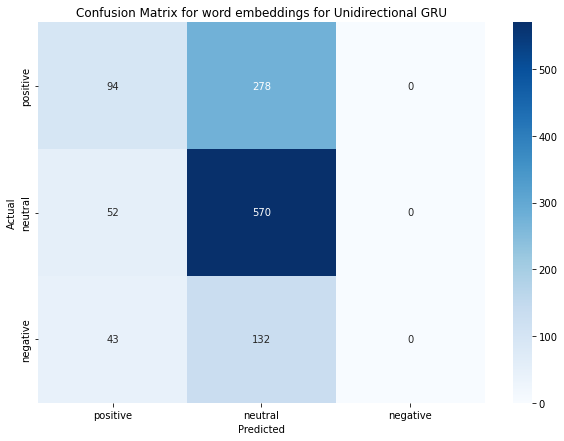

In [113]:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_dataloader, device=device)

   [i=100]    predicted_label=1       gt_label=1


   [i=200]    predicted_label=1       gt_label=2


   [i=300]    predicted_label=1       gt_label=0


   [i=400]    predicted_label=1       gt_label=0


   [i=500]    predicted_label=1       gt_label=0


   [i=600]    predicted_label=1       gt_label=0


   [i=700]    predicted_label=1       gt_label=1


   [i=800]    predicted_label=1       gt_label=2


   [i=900]    predicted_label=1       gt_label=1


   [i=1000]    predicted_label=1       gt_label=1


   [i=1100]    predicted_label=1       gt_label=0



Overall classification accuracy: 53.29%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



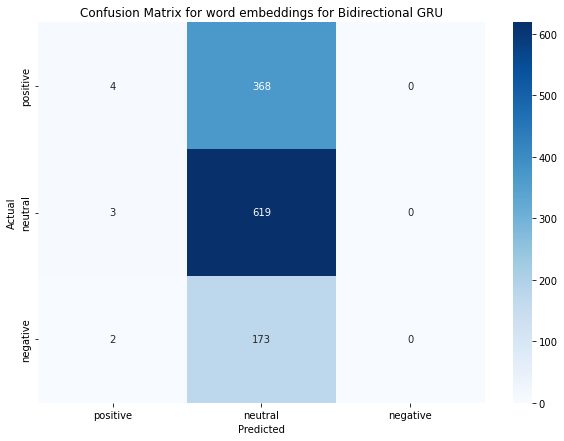

In [121]:
run_code_for_testing_text_classification_with_GRU(net=model1,test_dataloader=test_dataloader, device=device)